test1///////////////////////////////////////////


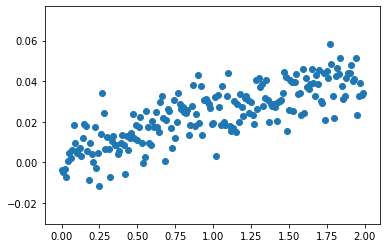

optimal learning rate =  0.033145320765805085
optimal learning rate's average regret =  -0.013090847351982746


In [15]:
import csv
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt

def adversarial_payoff(k, N):
    #returns an N x k matrix as game payoffs, and optimal payoff
    prefix_total_payoffs = np.array([0 for i in range(k)], dtype='float')
    pay_arr = np.zeros((N, k))
    for round in range(N):
        x = random.uniform(0,1)
        #In each round, put a random payoff on the action with lowest total payoff
        pay_arr[round][np.argmin(prefix_total_payoffs)] = x
        prefix_total_payoffs[np.argmin(prefix_total_payoffs)] += x
    return pay_arr, max(prefix_total_payoffs)

def bernoulli_payoff(k,N):
    #returns an N x k matrix as game payoffs, and optimal payoff
    #init a fixed probability p[i] for each action
    berno_p = np.array([random.uniform(0,0.5) for i in range(k)], dtype='float')
    print("fixed probability for each action: ", berno_p)
    pay_arr = np.zeros((N, k))
    for round in range(N):
        for i in range(k):
            # In each round, each action has payoff = 1 w.p. p[i]
            if  berno_p[i] >= random.uniform(0,1):
                pay_arr[round][i] = 1
            else:
                pay_arr[round][i] = 0
    prefix_total_payoffs = np.sum(pay_arr, axis = 0)
    print("actual average payoff for each action", prefix_total_payoffs/N)
    return pay_arr,  max(prefix_total_payoffs)

def exp_w(k, learn_rate, N, payoffs, opt):
    #main simulator
    utility = 0
    #keep track of current total payoffs for all actions
    prefix_total_payoffs = np.array([0 for i in range(k)], dtype='float')
    for round in range(N):
        #select a randomized action with EW algorithm
        action_selected = select_action(prefix_total_payoffs, learn_rate, k)
        #update total payoff for each action
        prefix_total_payoffs += payoffs[round]
        #accumulate the regret
        utility += payoffs[round][action_selected]
    return (opt - utility)/N

def select_action(prefix_total_payoffs, learn_rate, k):
    action_prob = np.array([0 for i in range(k)], dtype='float')
    if sum(prefix_total_payoffs) != 0:
        for action in range(k):
            #EW probability formula
            action_prob[action] = math.pow(1+learn_rate, prefix_total_payoffs[action])/sum(prefix_total_payoffs)
        #do weighted randomization on EW probability
        action_selected = random.choices(range(k), weights=action_prob, k=1)[0]
    else:
        #randomly select at first
        action_selected = (int)(random.uniform(0,k))
    return action_selected

def test1():
    print("test1///////////////////////////////////////////")
    N = 1000
    k = 3
    avg_regret = [0 for i in range(200)]
    #get payoff table for the whole game
    payoffs, opt = adversarial_payoff(k, N)
    for i in range(200):
        #iterate through learning rate 0.01, 0.02, ..., 2.00
        learning_rate = i/100
        #simulate
        avg_regret[i] = exp_w(k, learning_rate, N, payoffs, opt)
    plt.scatter(np.array(range(200), dtype = 'float')/100, avg_regret)
    plt.show()
    #see how optimal learning rate does in this game
    optimal_learning_rate = (float)(math.sqrt(math.log(k)/N))
    print("optimal learning rate = ", optimal_learning_rate)
    print("optimal learning rate's average regret = ", exp_w(k, optimal_learning_rate, N, payoffs, opt))
test1()

test2///////////////////////////////////////////
fixed probability for each action:  [0.11500133 0.44410266 0.33729602 0.39504127]
actual average payoff for each action [0.104 0.463 0.351 0.395]


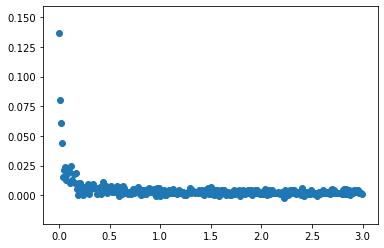

optimal learning rate =  0.037232974110590344
optimal learning rate's average regret =  0.034


In [14]:
def test2():
    print("test2///////////////////////////////////////////")
    N = 1000
    k = 4
    avg_regret = [0 for i in range(300)]
    #get payoff table for the whole game
    payoffs, opt = bernoulli_payoff(k, N)
    for i in range(300):
        #iterate through learning rate 0.01, 0.02, ..., 3.00
        learning_rate = i/100
        #simulate
        avg_regret[i] = exp_w(k, learning_rate, N, payoffs, opt)
    plt.scatter( np.array(range(300), dtype = 'float')/100, avg_regret)
    plt.show()
    #see how optimal learning rate does in this game
    optimal_learning_rate = (float)(math.sqrt(math.log(k)/N))
    print("optimal learning rate = ", optimal_learning_rate)
    print("optimal learning rate's average regret = ", exp_w(k, optimal_learning_rate, N, payoffs, opt))
test2()